In [33]:
import lightgbm as lgb
from sklearn import metrics
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import xgboost as xgb

In [34]:
df = pd.read_csv('../data/descripciones.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})


In [35]:
df1 = df.dropna(subset=df1.columns)

In [36]:
def predecir(model, train_features, train_labels, test_features, test_labels):
    predict = model.score(test_features,test_labels)
    print('Entrenamiento: {:0.4f}%'.format(model.score(train_features, train_labels)*100))
    print('Testeo: {:0.4f}%.'.format(predict*100))
    
    return predict

In [37]:
cat_features = ['ciudad', 'provincia', 'tipodepropiedad']
data_cols = df._get_numeric_data().columns

baseline_data = df1[data_cols]

encoder = LabelEncoder()
encoded = df1[cat_features].apply(encoder.fit_transform)

data = baseline_data.join(encoded)

x = data[data.columns.drop("precio")]
y = data['precio']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70)

In [38]:
rf = RandomForestRegressor(n_estimators = 800, min_samples_split = 3, min_samples_leaf = 2, max_features = 'log2', bootstrap = False)

In [39]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
predecir(rf,x_train,y_train,x_test,y_test)

Entrenamiento: 96.9613%
Testeo: 78.2934%.


0.7829336957311168

<BarContainer object of 24 artists>

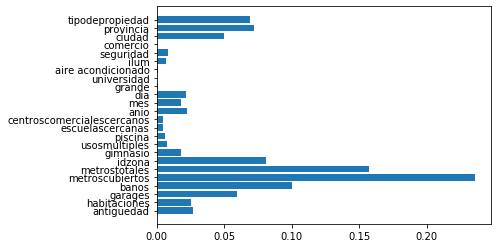

In [41]:
importancia = rf.feature_importances_
plt.barh(x.columns, rf.feature_importances_)

In [42]:
del rf